In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import cv2

from skimage.metrics import structural_similarity as ssim
from PIL import Image
from torchvision import transforms

In [5]:
# ------ import color palettes ------
df = pd.read_excel('./palette.xlsx', sheet_name='final')
palettes = {}
for row in df.values:
    palettes[row[0]] = [row[2:5].tolist(), row[6:9].tolist(), row[10:13].tolist(), row[14:17].tolist(), row[18:].tolist()]

---
### FID score
ref: https://github.com/mseitzer/pytorch-fid

---
### SSIM
ref: https://stackoverflow.com/questions/71567315/how-to-get-the-ssim-comparison-score-between-two-images

(512, 512)


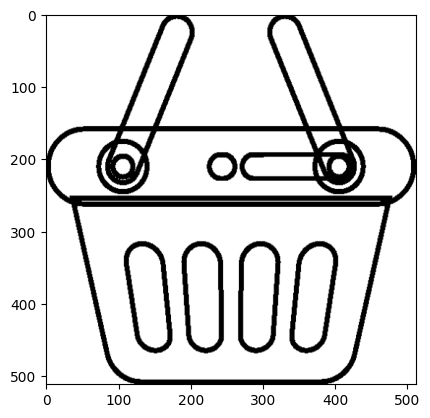

In [93]:
contour_image = Image.open("./contour/1.png").convert('L')
print(contour_image.size)
plt.imshow(contour_image, 'gray')

0.6094928458241965


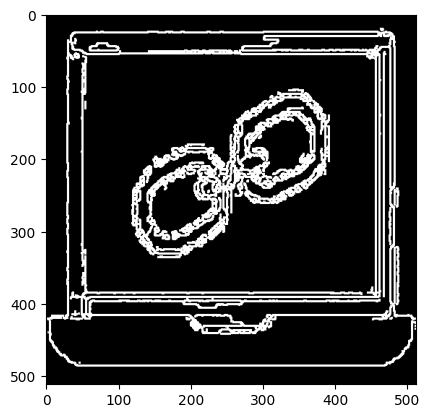

In [354]:
# AdvIcon
idx = 12
contour_image = np.array(Image.open(f"./color/{idx}.png").convert('L').resize((512, 512)))
color_image = Image.open(f"./output/AdvIcon/{idx}.png")
gray_image = np.array(color_image.crop((13, 13, 115, 115)).resize((512, 512)).convert('L'))

ori_edge = cv2.Canny(contour_image, threshold1=30, threshold2=60)
pred_edge = cv2.Canny(gray_image, threshold1=30, threshold2=60)

kernel = np.ones((3, 3), np.uint8)
ori_dilat = cv2.dilate(ori_edge, kernel, iterations=1)
dilated_edges = cv2.dilate(pred_edge, kernel, iterations=1)

ssim_score = ssim(ori_dilat, dilated_edges)
print(ssim_score)

# plt.imshow(ori_dilat, 'gray')
plt.imshow(dilated_edges, 'gray')

0.8529569002425885


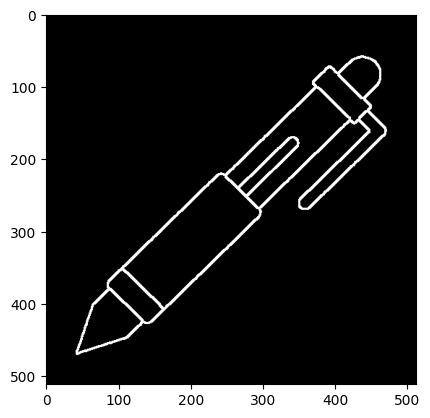

In [384]:
# our
idx = 3
contour_image = np.array(Image.open(f"./color/{idx}.png").convert('L').resize((512, 512)))
color_image = Image.open(f"./output/our/{idx}.png")
w, h = color_image.size
gray_image = np.array(color_image.resize((512, 512)).convert('L'))  # .crop((0+50, 0-50, w-50, h+50))

ori_edge = cv2.Canny(contour_image, threshold1=30, threshold2=60)
pred_edge = cv2.Canny(gray_image, threshold1=30, threshold2=60)

kernel = np.ones((3, 3), np.uint8)
ori_dilat = cv2.dilate(ori_edge, kernel, iterations=1)
dilated_edges = cv2.dilate(pred_edge, kernel, iterations=1)

ssim_score = ssim(ori_dilat, dilated_edges)
print(ssim_score)

# plt.imshow(ori_dilat, 'gray')
plt.imshow(dilated_edges, 'gray')

In [360]:
# Comic
for idx in range(1, 13):
    contour_image = np.array(Image.open(f"./color/{idx}.png").convert('L').resize((512, 512)))
    color_image = Image.open(f"./output/Comic/{idx}.png")
    gray_image = np.array(color_image.resize((512, 512)).convert('L'))

    ori_edge = cv2.Canny(contour_image, threshold1=30, threshold2=60)
    pred_edge = cv2.Canny(gray_image, threshold1=30, threshold2=60)

    kernel = np.ones((3, 3), np.uint8)
    ori_dilat = cv2.dilate(ori_edge, kernel, iterations=1)
    dilated_edges = cv2.dilate(pred_edge, kernel, iterations=1)

    ssim_score = ssim(ori_dilat, dilated_edges)
    print(ssim_score)

# plt.imshow(ori_dilat, 'gray')
# plt.imshow(dilated_edges, 'gray')

0.6176476402984529
0.5322045205386269
0.8048750165823058
0.8819585202589156
0.7046759805513141


d:\NTU\Icon\colorTransform\.venv\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


0.4555643375259395
0.6860030071744031
0.554207639376518
0.6170978962684955
0.6581054105511756
0.5918750782329901
0.5357182868133995


In [365]:
# MUNIT
for idx in range(1, 13):
    contour_image = np.array(Image.open(f"./color/{idx}.png").convert('L').resize((512, 512)))
    color_image = Image.open(f"./output/MUNIT/{idx}.jpg")
    gray_image = np.array(color_image.resize((512, 512)).convert('L'))

    ori_edge = cv2.Canny(contour_image, threshold1=30, threshold2=60)
    pred_edge = cv2.Canny(gray_image, threshold1=30, threshold2=60)

    kernel = np.ones((3, 3), np.uint8)
    ori_dilat = cv2.dilate(ori_edge, kernel, iterations=1)
    dilated_edges = cv2.dilate(pred_edge, kernel, iterations=1)

    ssim_score = ssim(ori_dilat, dilated_edges)
    print(ssim_score)

# plt.imshow(ori_dilat, 'gray')
# plt.imshow(dilated_edges, 'gray')

0.6480291668848326
0.6791886086240453
0.8003783757013657
0.7070480977428627
0.711779760921091
0.6152652592099153
0.7202379354179433
0.6892046897688516
0.8122321930498465
0.7096975009433375
0.725389776402299
0.6757335763096437


In [385]:
# SCFT
for idx in range(1, 13):
    contour_image = np.array(Image.open(f"./color/{idx}.png").convert('L').resize((512, 512)))
    color_image = Image.open(f"./output/SCFT/{idx}.png")
    gray_image = np.array(color_image.resize((512, 512)).convert('L'))

    ori_edge = cv2.Canny(contour_image, threshold1=30, threshold2=60)
    pred_edge = cv2.Canny(gray_image, threshold1=30, threshold2=60)

    kernel = np.ones((3, 3), np.uint8)
    ori_dilat = cv2.dilate(ori_edge, kernel, iterations=1)
    dilated_edges = cv2.dilate(pred_edge, kernel, iterations=1)

    ssim_score = ssim(ori_dilat, dilated_edges)
    print(ssim_score)

# plt.imshow(ori_dilat, 'gray')
# plt.imshow(dilated_edges, 'gray')

0.7974784523327441
0.7198529662450465
0.9197437635891007
0.6925652447267107
0.8727750842464819


d:\NTU\Icon\colorTransform\.venv\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


0.6190493843625954
0.926281042514145
0.7328149733796258
0.7275688162285836
0.7632392138373149
0.6957191991624815
0.643709418043611


In [410]:
# SGA
for idx in range(1, 13):
    contour_image = np.array(Image.open(f"./color/{idx}.png").convert('L').resize((512, 512)))
    color_image = Image.open(f"./output/SGA/{idx}.png")
    gray_image = np.array(color_image.crop((25, 25, 230, 230)).resize((512, 512)).convert('L'))

    ori_edge = cv2.Canny(contour_image, threshold1=30, threshold2=60)
    pred_edge = cv2.Canny(gray_image, threshold1=30, threshold2=60)

    kernel = np.ones((3, 3), np.uint8)
    ori_dilat = cv2.dilate(ori_edge, kernel, iterations=1)
    dilated_edges = cv2.dilate(pred_edge, kernel, iterations=1)

    ssim_score = ssim(ori_dilat, dilated_edges)
    print(ssim_score)

# plt.imshow(ori_dilat, 'gray')
# plt.imshow(dilated_edges, 'gray')

0.7259369451262785
0.8094132050303132
0.8827225410340886
0.7841175614292376
0.8117076510331095
0.6442859917464371
0.848839314242621
0.6935445731365634
0.732448482770855
0.7603251281919235
0.7195885941615855
0.6165226822228982


0.899702383561642


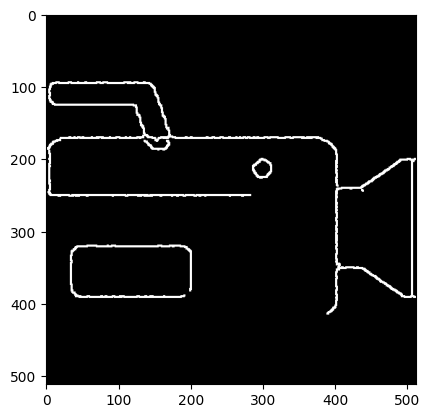

In [444]:
# style
# for idx in range(1, 13):
idx = 7
contour_image = np.array(Image.open(f"./color/{idx}.png").convert('L').resize((512, 512)))
color_image = Image.open(f"./output/style/{idx}.png")
gray_image = np.array(color_image.crop((13, 13, 115, 115)).resize((512, 512)).convert('L'))

ori_edge = cv2.Canny(contour_image, threshold1=30, threshold2=60)
pred_edge = cv2.Canny(gray_image, threshold1=30, threshold2=100)

kernel = np.ones((3, 3), np.uint8)
ori_dilat = cv2.dilate(ori_edge, kernel, iterations=1)
dilated_edges = cv2.dilate(pred_edge, kernel, iterations=1)

ssim_score = ssim(ori_dilat, dilated_edges)
print(ssim_score)

# plt.imshow(ori_dilat, 'gray')
plt.imshow(dilated_edges, 'gray')

---